# Rolling Planning mit Tardiness (Max)

In [1]:
# Datenzugriff
from configs.path_manager import get_path

# Utils
import src.utils.presenter as show
from src.utils.analize import check_constrains as check
from src.utils.production_process import initialize as init
from src.utils.production_process import filter as process_filter
from src.utils.production_process import gen_deadline as gen_deadline

# Solver Model
from src.models.lp import tardiness_scheduling as lp_tard_schedule
from src.models.lp import tardiness_rescheduling as lp_tard_reschedule
import src.models.heuristics.fcfs as fcfs

# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

# Extern
import pandas as pd
pd.set_option('display.max_rows', 16)

In [2]:
max_time = 60*10

## Laden der Initialisierungsdaten

In [3]:
data_path = get_path("data", "tardiness")

In [4]:
df_jssp = pd.read_csv(data_path / "02LP_all_jssp.csv")
df_times = pd.read_csv(data_path / "02LP_all_times.csv")

### Tag 0 

In [5]:
df_schedule = pd.read_csv(data_path / "02LP_init_schedule.csv")
df_schedule

,Job,Production_Plan_ID,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,0,0,0,51,1957.0,M00,51.0,29.0,80.0,0
1,0,0,1,51,1957.0,M01,80.0,78.0,158.0,0
2,0,0,2,51,1957.0,M02,158.0,9.0,167.0,0
3,0,0,3,51,1957.0,M03,167.0,36.0,203.0,0
4,0,0,4,51,1957.0,M04,203.0,49.0,252.0,0
5,0,0,5,51,1957.0,M05,252.0,11.0,263.0,0
6,0,0,6,51,1957.0,M06,263.0,62.0,325.0,0
7,0,0,7,51,1957.0,M07,325.0,56.0,381.0,0
...,...,...,...,...,...,...,...,...,...,...
172,12,8,9,992,3873.0,M08,3727.0,74.0,3801.0,0


In [6]:
df_execution = pd.read_csv(data_path / "02LP_execution.csv")
df_undone = pd.read_csv(data_path / "02LP_init_undone.csv")

### Settings

In [7]:
def get_schedule_filename(prefix: str = "", day: int = 0, data_txt: str = "schedule", suffix: str = "") -> str:
    file_template = "{prefix}_{data}_{day:02d}{suffix}.csv"
    if suffix:
        suffix = f"_{suffix}"
    return data_path / file_template.format(prefix=prefix,data=data_txt,day=day, suffix=suffix)

## Params

In [8]:
# fix
day_length = 1440

notebook_prefix = "03LP_simple"

#### Rescheduling für Tage 1-5
- Tag 1: Ankunfttermine am Tag 1 + unabgeschlosse von Vortagen (evtl. Tag 0)
- Tag 2: Ankunfttermine am Tag 2 + unabgeschlosse von Vortagen (evtl. Tag 0 "oder" Tag 1)
- ...
- Tag 5: Ankunfttermine in Tag 5 + unabgeschlosse von Vortagen

In [9]:
first_start = 1
last_planning_start = 5


Day 01: [1440, 2880)
[INFO] Jobs zwischen 1440 und 2880: 22 Jobs gefunden.
[INFO] 125 zusätzliche Operationen hinzugefügt (gesamt: 345).
[INFO] 2 laufende Operation(en) aus vorherigen Tagen enden erst nach Tagesbeginn.
BigM: 12000

Solver-Informationen:
  Summe Tardiness         : 5077.5
  Solver-Status           : Optimal
  Anzahl Variablen        : 6268
  Anzahl Constraints      : 12119
  Laufzeit                : ~601 Sekunden


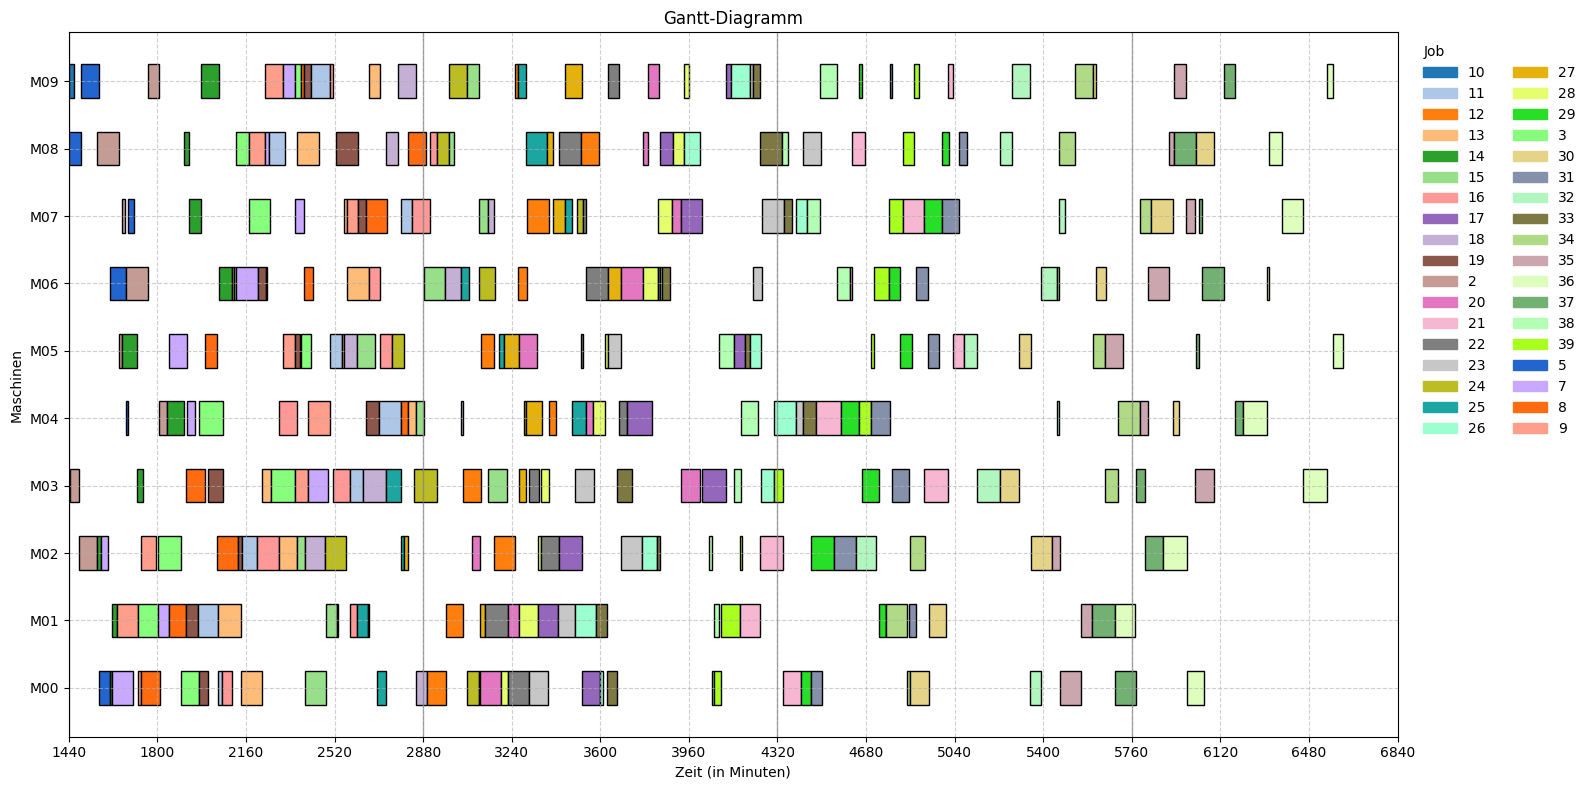

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job

+++ Alle Constraints wurden erfüllt.

[24:00:00] Job 10 started on M09
[24:00:50] Job 5 started on M08
[24:02:25] Job 2 started on M03
[24:19:24] Job 10 finished on M09 (after 19 minutes 24 seconds)
[24:51:21] Job 2 finished on M03 (after 48 minutes 56 seconds)
[24:51:21] Job 2 started on M02
[25:23:19] Job 5 finished on M08 (after 82 minutes 29 seconds)
[25:23:19] Job 5 started on M09
[25:46:03] Job 2 finished on M02 (after 54 minutes 41 seconds)
[25:55:25] Job 14 started on M02
[25:55:25] Job 2 started on M08
[26:05:27] Job 14 finished on M02 (after 10 minutes 02 seconds)
[26:08:22] Job 5 finished on M09 (after 45 minutes 03 seconds)
[26:08:22] Job 5 started on M00
[26:09:25] Job 7 started on M02
[26:37:37] Job 7 finished on M02 (after 28 minutes 11 seconds)
[27:12:41] Job

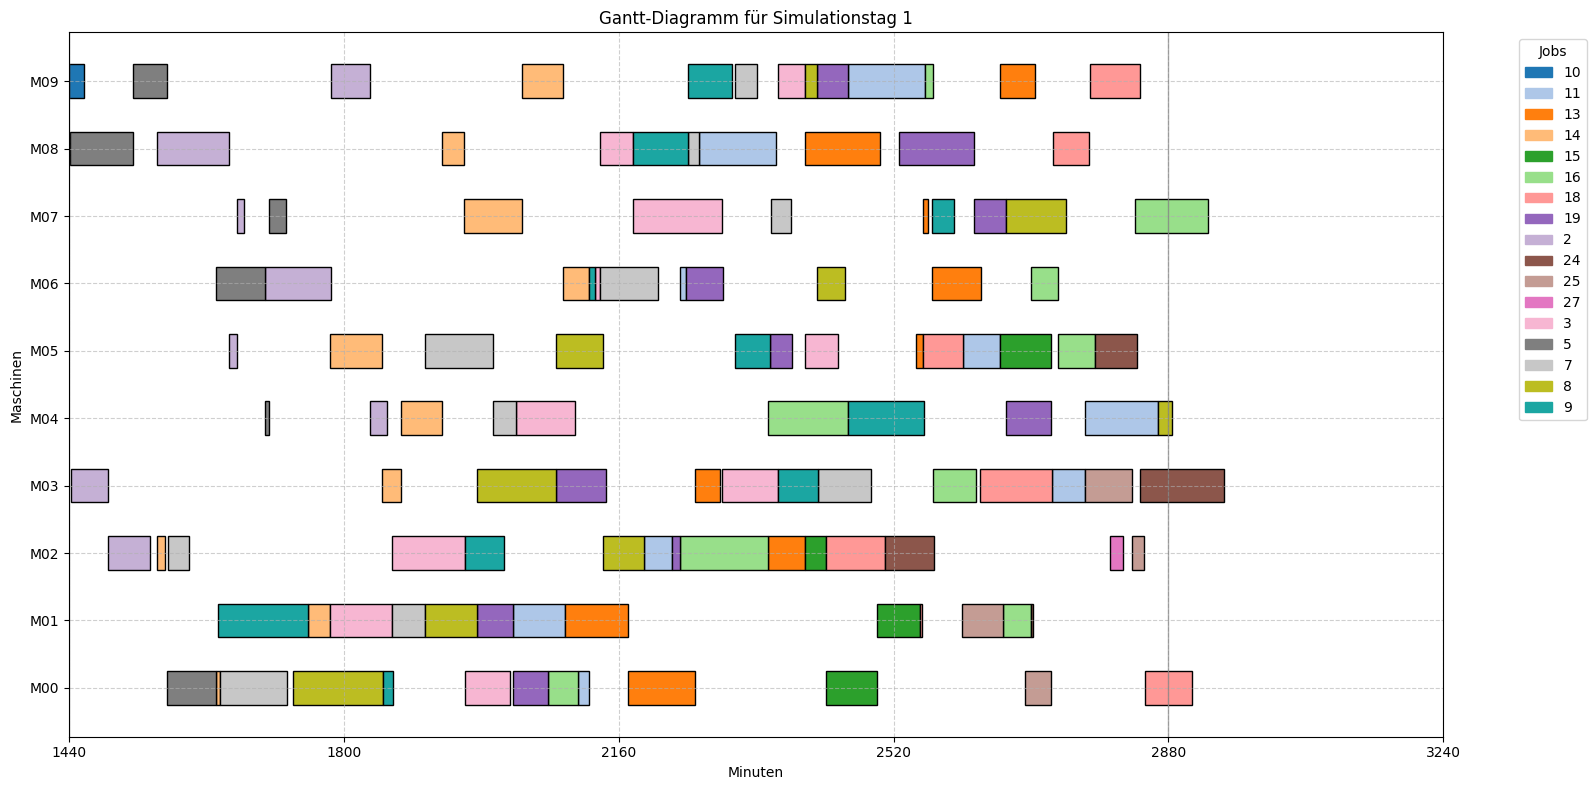


Day 02: [2880, 4320)
[INFO] Jobs zwischen 2880 und 4320: 16 Jobs gefunden.
[INFO] 224 zusätzliche Operationen hinzugefügt (gesamt: 384).
[INFO] 4 laufende Operation(en) aus vorherigen Tagen enden erst nach Tagesbeginn.
BigM: 13000

Solver-Informationen:
  Summe Tardiness         : 30691.4
  Solver-Status           : Optimal
  Anzahl Variablen        : 7832
  Anzahl Constraints      : 15192
  Laufzeit                : ~601 Sekunden


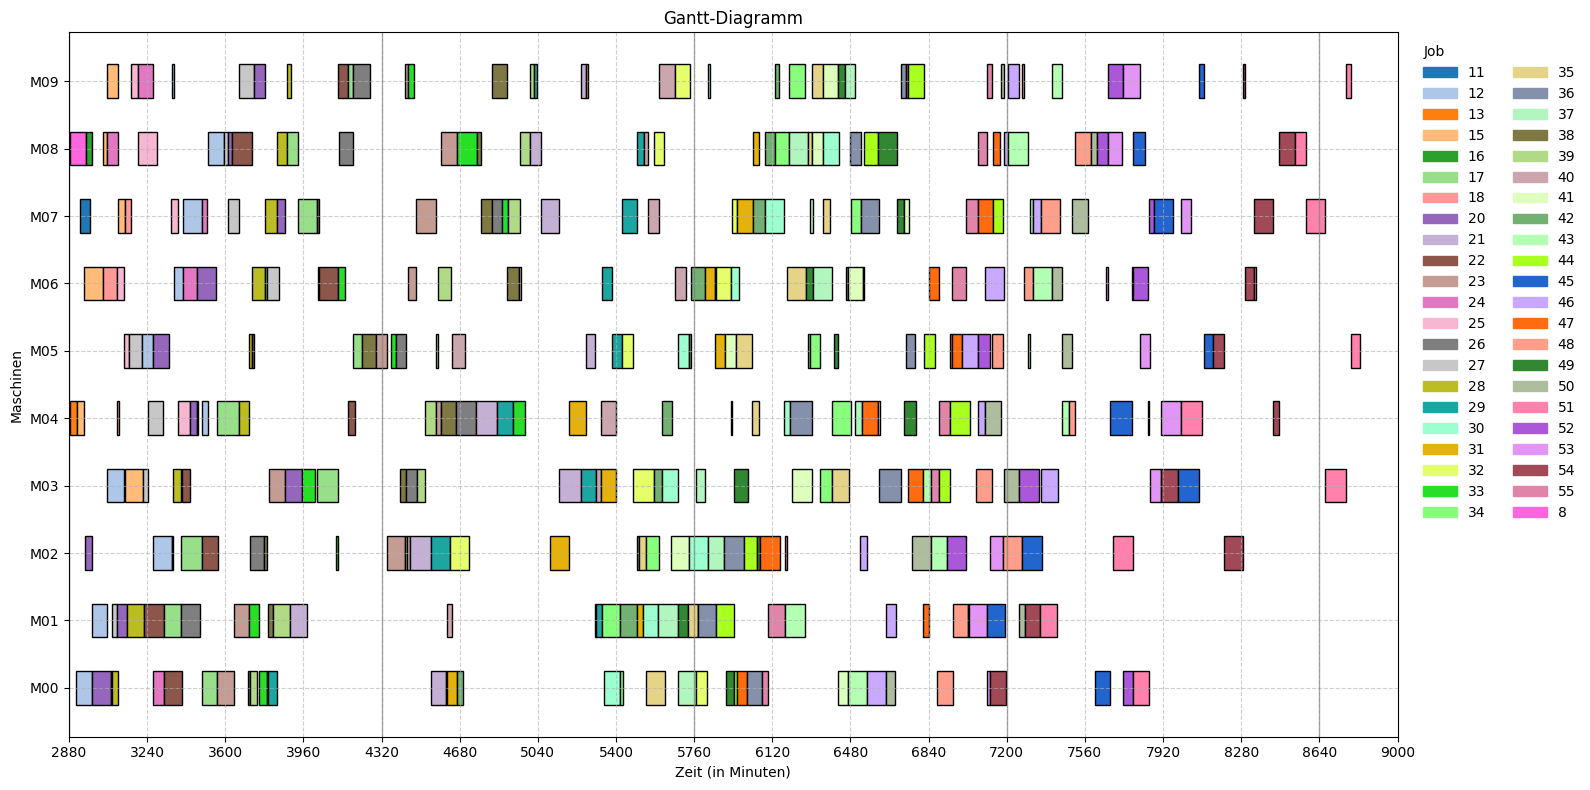

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job

+++ Alle Constraints wurden erfüllt.

[48:04:36] Job 13 started on M04
[48:04:36] Job 8 started on M08
[48:30:46] Job 12 started on M00
[48:47:48] Job 13 finished on M04 (after 43 minutes 11 seconds)
[48:47:48] Job 15 started on M04
[48:51:25] Job 11 started on M07
[49:15:46] Job 20 started on M02
[49:16:52] Job 15 finished on M04 (after 29 minutes 05 seconds)
[49:16:52] Job 15 started on M06
[49:29:15] Job 8 finished on M08 (after 84 minutes 38 seconds)
[49:29:15] Job 16 started on M08
[49:36:14] Job 20 finished on M02 (after 20 minutes 28 seconds)
[49:55:28] Job 12 finished on M00 (after 84 minutes 42 seconds)
[49:55:28] Job 20 started on M00
[49:55:28] Job 12 started on M01
[50:12:15] Job 11 finished on M07 (after 80 minutes 49 seconds)
[50:14:08] Job 16 finished on M08 (

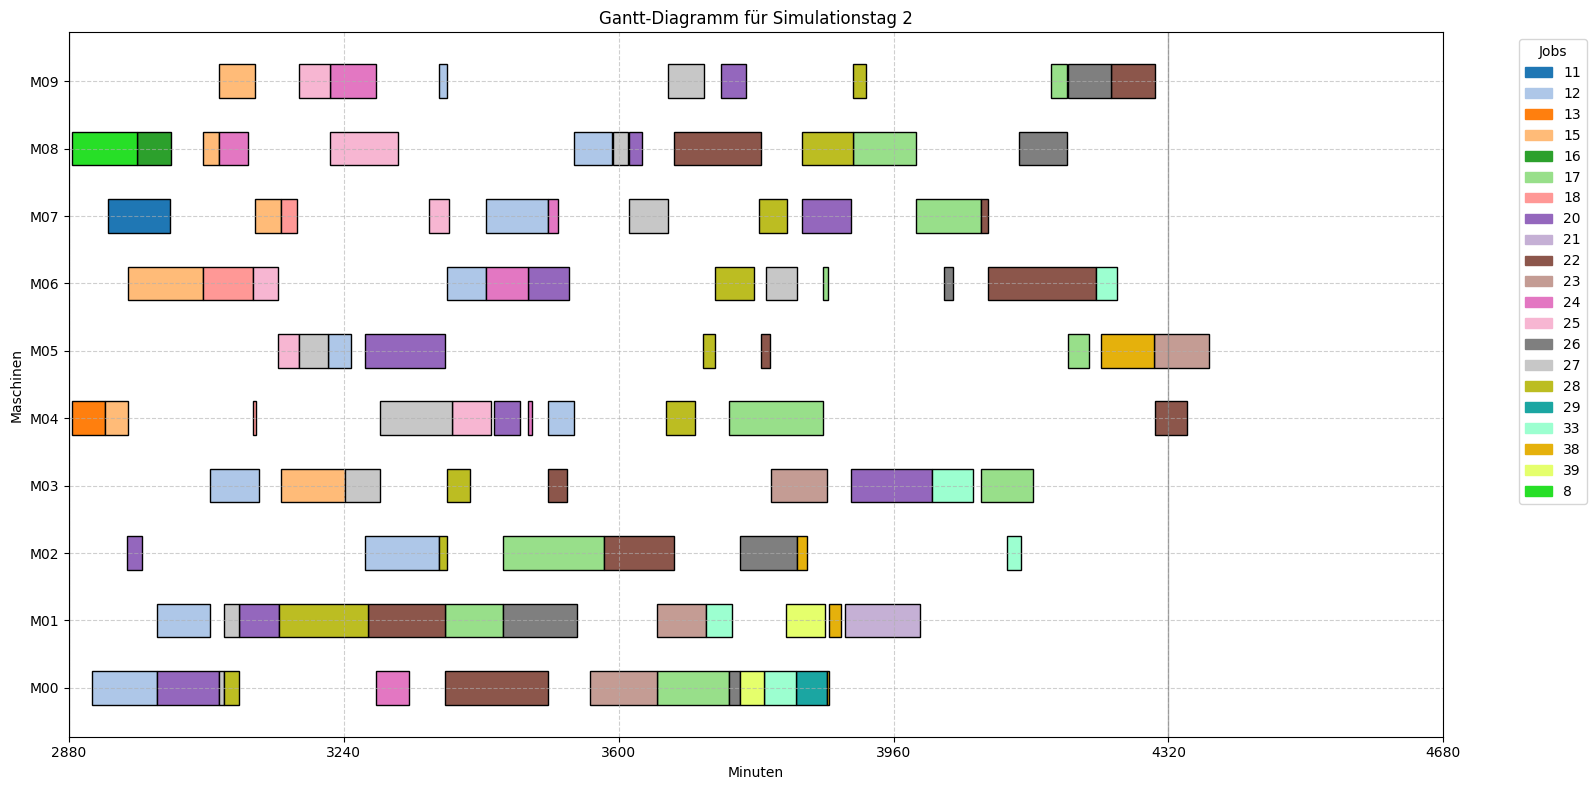


Day 03: [4320, 5760)
[INFO] Jobs zwischen 4320 und 5760: 15 Jobs gefunden.
[INFO] 277 zusätzliche Operationen hinzugefügt (gesamt: 427).
[INFO] 2 laufende Operation(en) aus vorherigen Tagen enden erst nach Tagesbeginn.
BigM: 14000

Solver-Informationen:
  Summe Tardiness         : 57370.9
  Solver-Status           : Optimal
  Anzahl Variablen        : 9529
  Anzahl Constraints      : 18541
  Laufzeit                : ~602 Sekunden


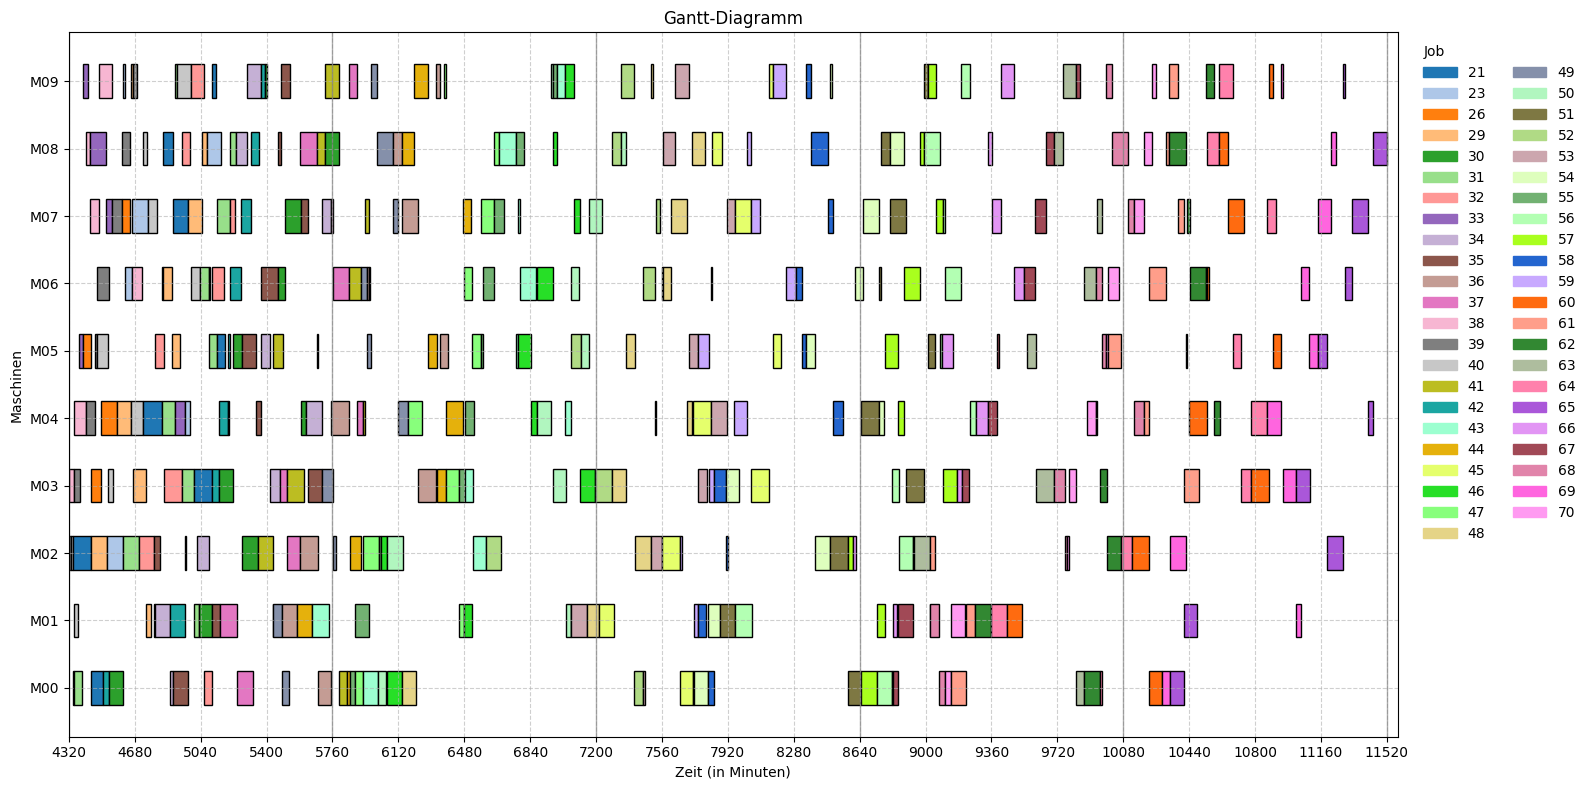

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job

+++ Alle Constraints wurden erfüllt.

[72:00:00] Job 38 started on M03
[72:00:00] Job 39 started on M02
[72:08:37] Job 39 finished on M02 (after 08 minutes 37 seconds)
[72:09:00] Job 40 started on M02
[72:22:57] Job 40 finished on M02 (after 13 minutes 58 seconds)
[72:23:00] Job 21 started on M02
[72:23:00] Job 40 started on M00
[72:24:21] Job 38 finished on M03 (after 24 minutes 22 seconds)
[72:26:00] Job 39 started on M03
[72:26:00] Job 38 started on M04
[72:28:33] Job 40 finished on M00 (after 05 minutes 33 seconds)
[72:29:00] Job 31 started on M00
[72:29:00] Job 40 started on M01
[72:49:42] Job 40 finished on M01 (after 20 minutes 43 seconds)
[72:53:29] Job 33 started on M05
[73:05:01] Job 33 finished on M05 (after 11 minutes 32 seconds)
[73:05:04] Job 31 finished on M00

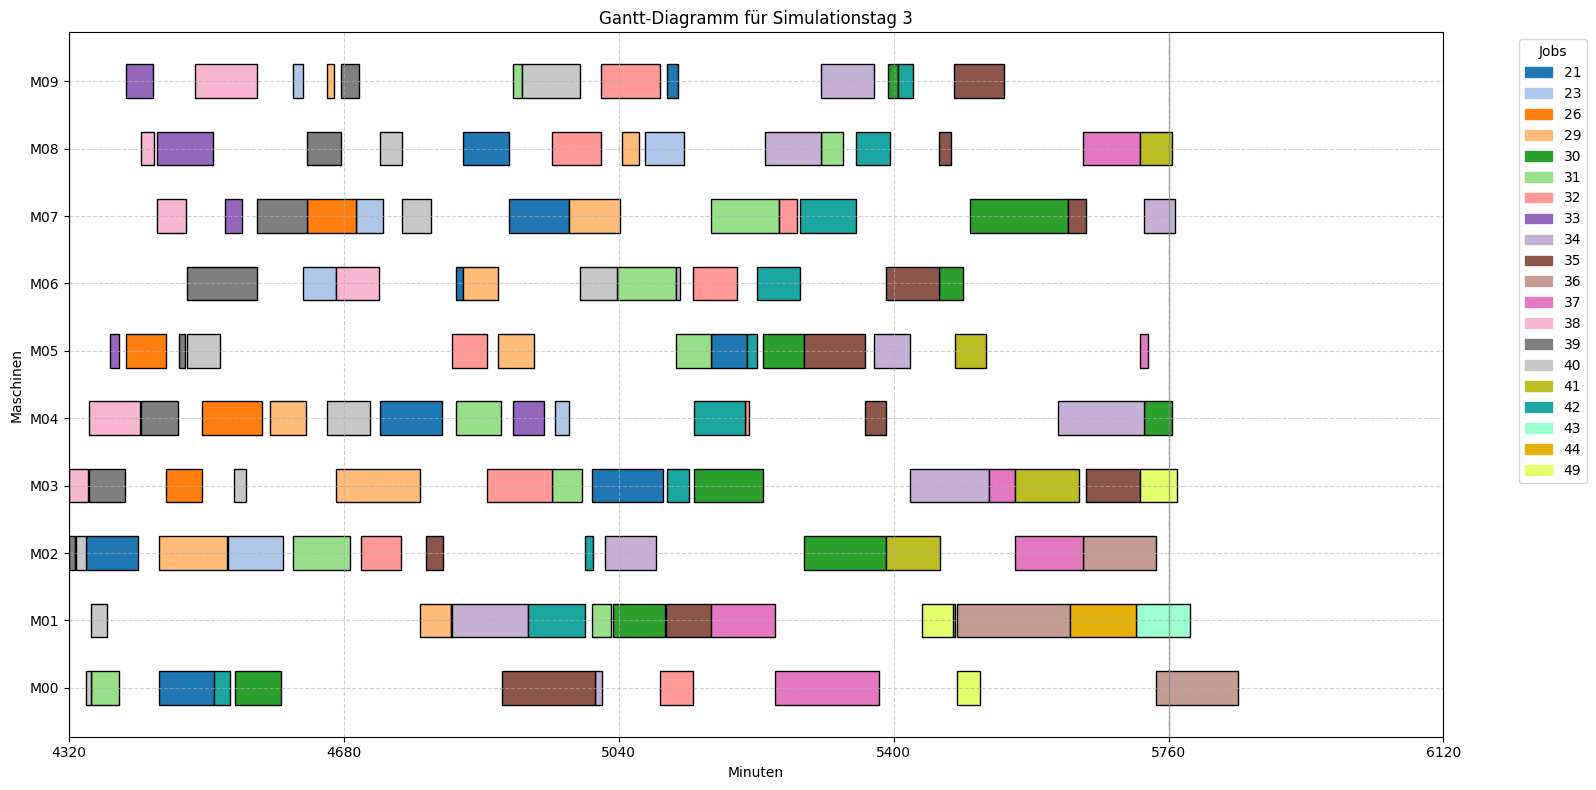


Day 04: [5760, 7200)
[INFO] Jobs zwischen 5760 und 7200: 18 Jobs gefunden.
[INFO] 292 zusätzliche Operationen hinzugefügt (gesamt: 472).
[INFO] 6 laufende Operation(en) aus vorherigen Tagen enden erst nach Tagesbeginn.
BigM: 16000


In [ ]:
for day_numb in range(first_start, last_planning_start + 1):
    day_start = day_length * day_numb
    day_end = day_start + day_length
    print(f"\nDay {day_numb:02d}: [{day_start}, {day_end})")

    # ------------------- I. Ankunfts- und Operationsvorbereitung -------------------
    df_jssp_curr, df_times_curr = process_filter.jobs_by_arrival_window(df_times, df_jssp, day_start, day_end, verbose= True)

    
    df_jssp_curr = process_filter.extend_with_undone_operations(df_jssp_curr, df_undone, verbose= True)
    df_times_curr = process_filter.update_times_after_operation_changes(df_times, df_jssp_curr)

    # ------------------- II. Relevante laufende Operationen -------------------------
    df_execution_important = process_filter.get_operations_running_into_day(df_execution, day_start, verbose= True)

    # ------------------- III. Rescheduling durchführen -------------------------------

    df_schedule = lp_tard_reschedule.solve_jssp_sum_with_fixed_ops(df_jssp_curr, df_times_curr, df_execution_important,
                                                                   reschedule_start = day_start,solver= "HiGHS",
                                                                   msg=False, timeLimit=max_time, gapRel= 0.05)
    df_schedule.to_csv(get_schedule_filename(notebook_prefix, day=day_numb), index=False)

    show.plot_gantt(df_schedule, perspective="Machine")
    check.all_in_one(df_schedule)

    # ------------------- IV. Einen Tag simulieren -------------------------------------

    simulation = ProductionDaySimulation(df_schedule, vc=0.25)
    df_execution = simulation.run(start_time=day_start, end_time=day_end)
    if not df_execution.empty:
        show.plot_gantt_machines(df_execution, title=f"Gantt-Diagramm für Simulationstag {day_numb}")
    else:
        print(f"Nothing executed on day {day_numb}")

    df_undone = process_filter.get_unexecuted_operations(df_schedule, df_execution)
    
